In [2]:
import Pkg ;
Pkg.add(Pkg.PackageSpec(;name="Turing", version="0.6.23"))
# Pkg.add(Pkg.PackageSpec(;name="AdvancedHMC", version="0.2.1"))
Pkg.add("AdvancedHMC")
Pkg.add("Libtask")
import Pkg; Pkg.add("RDatasets")
import Pkg; Pkg.add("MCMCChains")
# Import Turing and Distributions.
import Pkg; Pkg.add("StatsFuns")

 Resolving package versions...


InterruptException: InterruptException:

In [63]:
# Using Base modules.
using Random
# Load a plotting library.
using Plots
# Load the distributions library.
using Distributions
# Set the true probability of heads in a coin.
p_true = 0.5
# Iterate from having seen 0 observations to 100 observations.
Ns = 0:100;

In [64]:
# Draw data from a Bernoulli distribution, i.e. draw heads or tails.
Random.seed!(12)
data = rand(Bernoulli(p_true), last(Ns))

# Here's what the first five coin flips look like:
data[1:5]
# prior_belief = Beta(1, 1);

In [65]:
prior_belief = Beta(1, 1);

In [70]:
# Import StatsPlots for animating purposes.
using StatsPlots

# Make an animation.
animation = @gif for (i, N) in enumerate(Ns)

    # Count the number of heads and tails.
    heads = sum(data[1:i-1])
    tails = N - heads
    
    # Update our prior belief in closed form (this is possible because we use a conjugate prior).
    updated_belief = Beta(prior_belief.α + heads, prior_belief.β + tails)

    # Plotting
    plot(updated_belief, 
        size = (500, 250), 
        title = "Updated belief after N observations",
        xlabel = "probability of heads", 
        ylabel = "", 
        legend = nothing,
        xlim = (0,1),
        fill=0, α=0.3, w=3)
    vline!([p_true])
end

┌ Info: Saved animation to 
│   fn = /home/jovyan/work/tmp.gif
└ @ Plots /home/jovyan/.julia/packages/Plots/h3o4c/src/animation.jl:95


Plots.AnimatedGif("/home/jovyan/work/tmp.gif")

In [67]:
using Turing, MCMCChains

# Load the distributions library.
using Distributions

# Load StatsPlots for density plots.
using StatsPlots

@model coinflip(y) = begin
    
    # Our prior belief about the probability of heads in a coin.
    p ~ Beta(1, 1)
    
    # The number of observations.
    N = length(y)
    for n in 1:N
        # Heads or tails of a coin are drawn from a Bernoulli distribution.
        y[n] ~ Bernoulli(p)
    end
end;
# Settings of the Hamiltonian Monte Carlo (HMC) sampler.
iterations = 1000
ϵ = 0.05
τ = 10

# Start sampling.
chain = sample(coinflip(data), HMC(iterations, ϵ, τ));

┌ Info: Finished 1000 sampling steps in 0.0951112 (s)
│   h = Hamiltonian(metric=UnitEuclideanMetric([1.0]))
│   τ = StaticTrajectory(integrator=Leapfrog(ϵ=0.05), λ=10))
│   EBFMI_est = 689.465566704554
│   average_acceptance_rate = 0.9970026538834612
└ @ AdvancedHMC /home/jovyan/.julia/packages/AdvancedHMC/seWi9/src/sampler.jl:138


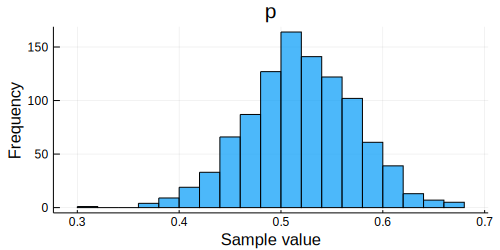

In [68]:
 #Construct summary of the sampling process for the parameter p, i.e. the probability of heads in a coin.
p_summary = chain[:p]
plot(p_summary, seriestype = :histogram)

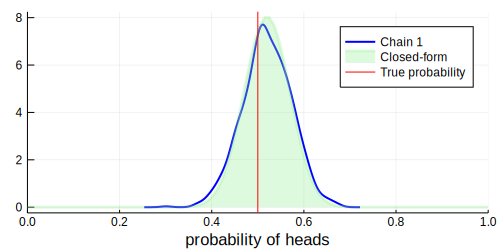

In [69]:
# Compute the posterior distribution in closed-form.
N = length(data)
heads = sum(data)
updated_belief = Beta(prior_belief.α + heads, prior_belief.β + N - heads)

# Visualize a blue density plot of the approximate posterior distribution using HMC (see Chain 1 in the legend).
p = plot(p_summary, seriestype = :density, xlim = (0,1), legend = :best, w = 2, c = :blue)

# Visualize a green density plot of posterior distribution in closed-form.
plot!(p, range(0, stop = 1, length = 100), pdf.(Ref(updated_belief), range(0, stop = 1, length = 100)), 
        xlabel = "probability of heads", ylabel = "", title = "", xlim = (0,1), label = "Closed-form",
        fill=0, α=0.3, w=3, c = :lightgreen)

# Visualize the true probability of heads in red.
vline!(p, [p_true], label = "True probability", c = :red)

In [4]:
using Turing
using StatsPlots
using AdvancedHMC

# Define a simple Normal model with unknown mean and variance.
@model gdemo(x, y) = begin
  s ~ InverseGamma(2, 3)
  m ~ Normal(0, sqrt(s))
  x ~ Normal(m, sqrt(s))
  y ~ Normal(m, sqrt(s))
end

#  Run sampler, collect results
# chn = sample(gdemo(1.5, 2), Turing.HMC(.15, 5, 10), 1000)

# Summarise results (currently requires the master branch from MCMCChains)
# describe(chn)

# Plot and save results
# p = plot(chn)
iterations = 1000
ϵ = 0.05
τ = 10

# Start sampling.
chain = sample(gdemo(1.5, 2), HMC(iterations, ϵ, τ));

┌ Info: Finished 1000 sampling steps in 0.1022893 (s)
│   h = Hamiltonian(metric=UnitEuclideanMetric([1.0, 1.0]))
│   τ = StaticTrajectory(integrator=Leapfrog(ϵ=0.05), λ=10))
│   EBFMI_est = 881.7945244406986
│   average_acceptance_rate = 0.9991716008381261
└ @ AdvancedHMC /home/jovyan/.julia/packages/AdvancedHMC/seWi9/src/sampler.jl:138


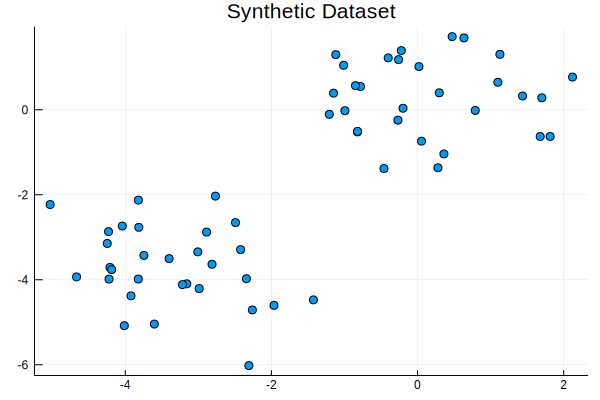

In [15]:
using Distributions, StatsPlots, Random

# Set a random seed.
Random.seed!(3)

# Construct 30 data points for each cluster.
N = 30

# Parameters for each cluster, we assume that each cluster is Gaussian distributed in the example.
μs = [-3.5, 0.0]

# Construct the data points.
x = mapreduce(c -> rand(MvNormal([μs[c], μs[c]], 1.), N), hcat, 1:2)

# Visualization.
scatter(x[1,:], x[2,:], legend = false, title = "Synthetic Dataset")

In [16]:
using Turing, MCMCChains

# Turn off the progress monitor.
Turing.turnprogress(false);

┌ Info: [Turing]: global PROGRESS is set as false
└ @ Turing /home/jovyan/.julia/packages/Turing/eIa7P/src/Turing.jl:24


In [17]:
@model GaussianMixtureModel(x) = begin
    
    D, N = size(x)

    # Draw the paramters for cluster 1.
    μ1 ~ Normal()
    
    # Draw the paramters for cluster 2.
    μ2 ~ Normal()
    
    μ = [μ1, μ2]
    
    # Uncomment the following lines to draw the weights for the K clusters 
    # from a Dirichlet distribution.
    
    # α = 1.0
    # w ~ Dirichlet(2, α)
    
    # Comment out this line if you instead want to draw the weights.
    w = [0.5, 0.5]
    
    # Draw assignments for each datum and generate it from a multivariate normal.
    k = Vector{Int}(undef, N)
    for i in 1:N
        k[i] ~ Categorical(w)
        x[:,i] ~ MvNormal([μ[k[i]], μ[k[i]]], 1.)
    end
    return k
end

GaussianMixtureModel (generic function with 2 methods)

In [18]:
Turing.setadbackend(:forward_diff)

:forward_diff

In [19]:
gmm_model = GaussianMixtureModel(x);

In [25]:
# chain = sample(gdemo(1.5, 2), HMC(iterations, ϵ, τ));
# gmm_sampler = Gibbs(100, PG(100, 1, :k), HMC(1, 0.05, 10, :μ1, :μ2))
# gmm_sampler = Gibbs(100, HMC(1, 0.05, 10, :μ1, :μ2, :k))
# gmm_sampler =  HMC(1, 0.05, 10, :μ1, :μ2, :k)
gmm_sampler =  PG(100, 1, :μ1, :μ2, :k)


# gmm_sampler = Gibbs(100, PG(100, 1, :k), HMC(iterations, ϵ, τ,  :μ1, :μ2))
tchain = mapreduce(c -> sample(gmm_model, gmm_sampler), chainscat, 1:3);

┌ Info: [PG] Finished with
└ @ Turing.Inference /home/jovyan/.julia/packages/Turing/eIa7P/src/inference/AdvancedSMC.jl:198
┌ Info:   Running time    = 2.2731873;
└ @ Turing.Inference /home/jovyan/.julia/packages/Turing/eIa7P/src/inference/AdvancedSMC.jl:199
┌ Info: [PG] Finished with
└ @ Turing.Inference /home/jovyan/.julia/packages/Turing/eIa7P/src/inference/AdvancedSMC.jl:198
┌ Info:   Running time    = 1.4167857;
└ @ Turing.Inference /home/jovyan/.julia/packages/Turing/eIa7P/src/inference/AdvancedSMC.jl:199
┌ Info: [PG] Finished with
└ @ Turing.Inference /home/jovyan/.julia/packages/Turing/eIa7P/src/inference/AdvancedSMC.jl:198
┌ Info:   Running time    = 0.9029216;
└ @ Turing.Inference /home/jovyan/.julia/packages/Turing/eIa7P/src/inference/AdvancedSMC.jl:199


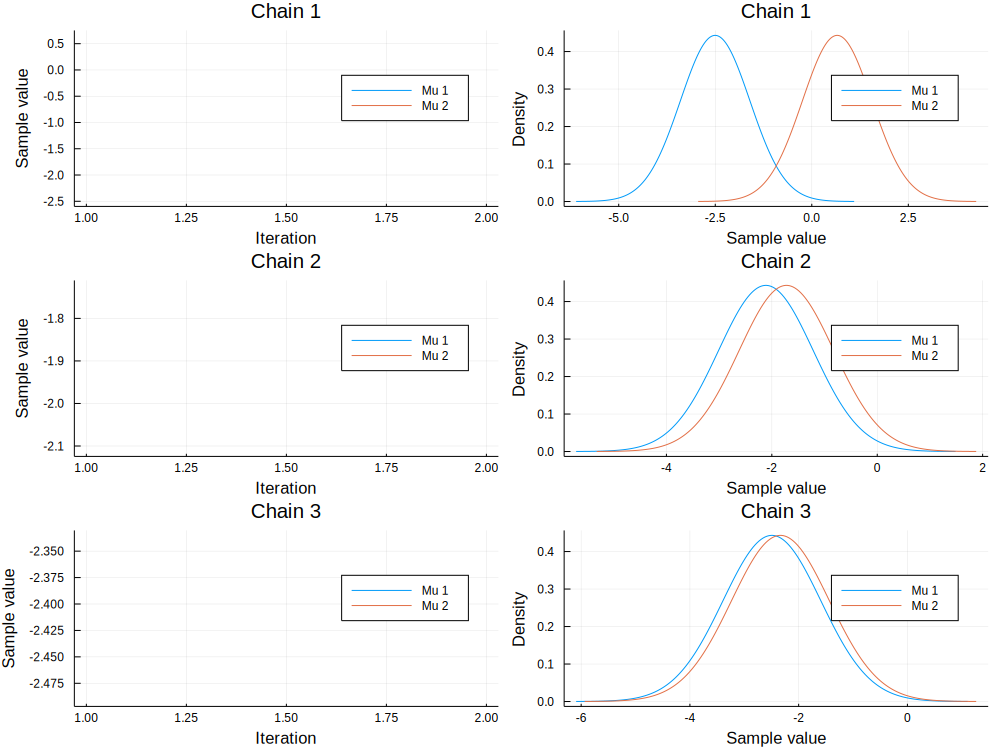

In [26]:
ids = findall(map(name -> occursin("μ", name), names(tchain)));
p=plot(tchain[:, ids, :], legend=true, labels = ["Mu 1" "Mu 2"], colordim=:parameter)

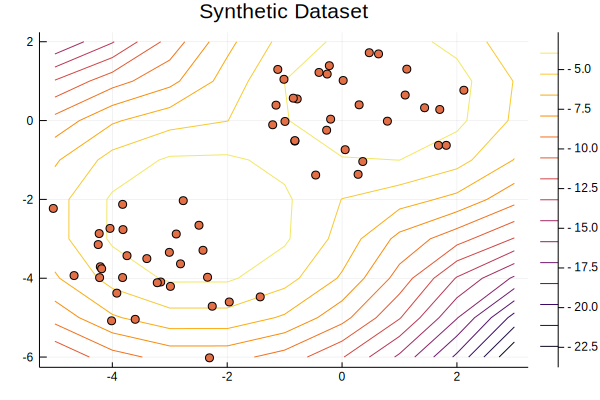

In [27]:
tchain = tchain[:, :, 1]

function predict(x, y, w, μ)
    # Use log-sum-exp trick for numeric stability.
    return Turing.logaddexp(
        log(w[1]) + logpdf(MvNormal([μ[1], μ[1]], 1.), [x, y]), 
        log(w[2]) + logpdf(MvNormal([μ[2], μ[2]], 1.), [x, y])
    )
end
contour(range(-5, stop = 3), range(-6, stop = 2), 
    (x, y) -> predict(x, y, [0.5, 0.5], [mean(tchain[:μ1].value), mean(tchain[:μ2].value)])
)
scatter!(x[1,:], x[2,:], legend = false, title = "Synthetic Dataset")

In [31]:
# # Import Turing and Distributions.
# import Pkg; Pkg.add("StatsFuns")
using Turing, Distributions

# Import RDatasets.
using RDatasets

# Import MCMCChains, Plots, and StatsPlots for visualizations and diagnostics.
using MCMCChains, Plots, StatsPlots

# We need a logistic function, which is provided by StatsFuns.
using StatsFuns: logistic

# Set a seed for reproducibility.
using Random
Random.seed!(0);

# Turn off progress monitor.
Turing.turnprogress(false)

┌ Info: [Turing]: global PROGRESS is set as false
└ @ Turing /home/jovyan/.julia/packages/Turing/eIa7P/src/Turing.jl:24


false

In [32]:
data = RDatasets.dataset("ISLR", "Default");

# Show the first six rows of the dataset.
first(data, 6)

,Default,Student,Balance,Income
,Categorical…,Categorical…,Float64,Float64
1,No,No,729.526,44361.6
2,No,Yes,817.18,12106.1
3,No,No,1073.55,31767.1
4,No,No,529.251,35704.5
5,No,No,785.656,38463.5
6,No,Yes,919.589,7491.56


In [33]:
# Create new rows, defaulted to zero.
data[:DefaultNum] = 0.0
data[:StudentNum] = 0.0

for i in 1:length(data.Default)
    # If a row's "Default" or "Student" columns say "Yes",
    # set them to 1 in our new columns.
    data[:DefaultNum][i] = data.Default[i] == "Yes" ? 1.0 : 0.0
    data[:StudentNum][i] = data.Student[i] == "Yes" ? 1.0 : 0.0
end

# Delete the old columns which say "Yes" and "No".
deletecols!(data, :Default)
deletecols!(data, :Student)

# Show the first six rows of our edited dataset.
first(data, 6)

┌ Warning: Implicit broadcasting to a new column in DataFrame assignment is deprecated.Use `df[!, col_ind] .= v`  when `df` has some columns
│   caller = top-level scope at In[33]:1
└ @ Core In[33]:1
┌ Warning: Implicit broadcasting to a new column in DataFrame assignment is deprecated.Use `df[!, col_ind] .= v`  when `df` has some columns
│   caller = top-level scope at In[33]:3
└ @ Core In[33]:3
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[33]:8
└ @ Core ./In[33]:8
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[33]:9
└ @ Core ./In[33]:9
┌ Warning: `deletecols!(df::DataFrame, inds)` is deprecated, use `select!(df, Not(inds))` instead.
│   caller = top-level scope at In[33]:11
└ @ Core In[33]:11
┌ Warning: `deletecols!(df::DataFrame, inds)` is deprecated, use `select!(df, Not(inds))` instead.
│   caller 

,Balance,Income,DefaultNum,StudentNum
,Float64,Float64,Float64,Float64
1,729.526,44361.6,0.0,0.0
2,817.18,12106.1,0.0,1.0
3,1073.55,31767.1,0.0,0.0
4,529.251,35704.5,0.0,0.0
5,785.656,38463.5,0.0,0.0
6,919.589,7491.56,0.0,1.0


In [34]:
# Function to split samples.
function split_data(df, at = 0.70)
    (r, _) = size(df)
    index = Int(round(r * at))
    train = df[1:index, :]
    test  = df[(index+1):end, :]
    return train, test
end

# Split our dataset 5/95 into training/test sets.
train, test = split_data(data, 0.05);

# Create our labels. These are the values we are trying to predict.
train_label = train[:DefaultNum]
test_label = test[:DefaultNum]

# Remove the columns that are not our predictors.
train = train[[:StudentNum, :Balance, :Income]];
test = test[[:StudentNum, :Balance, :Income]];

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[34]:12
└ @ Core In[34]:12
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[34]:15
└ @ Core In[34]:15
┌ Warning: `getindex(df::DataFrame, col_inds::Union{AbstractVector, Regex, Not})` is deprecated, use `df[:, col_inds]` instead.
│   caller = top-level scope at In[34]:16
└ @ Core In[34]:16
┌ Warning: `getindex(df::DataFrame, col_inds::Union{AbstractVector, Regex, Not})` is deprecated, use `df[:, col_inds]` instead.
│   caller = top-level scope at In[34]:19
└ @ Core In[34]:19


In [35]:
# Convert the DataFrame objects to matrices.
train = Matrix(train);
test = Matrix(test);

In [36]:
train = (train .- mean(train, dims=1)) ./ std(train, dims=1)
test = (test .- mean(test, dims=1)) ./ std(test, dims=1)

9500×3 Array{Float64,2}:
  1.54877    0.267577   -1.28037 
  1.54877    2.13084    -0.976825
 -0.645608  -0.892311    0.62087 
 -0.645608  -0.500971    0.311075
 -0.645608  -1.72494     0.826565
 -0.645608  -0.193203    0.438225
  1.54877    0.565783   -1.53722 
 -0.645608  -0.132822    1.19331 
 -0.645608  -0.436599    0.672515
  1.54877   -0.693263   -0.797271
 -0.645608   0.521494    2.03357 
 -0.645608   1.48692     1.21049 
  1.54877   -0.0801337  -0.746769
  ⋮                              
 -0.645608  -1.72494     0.616141
  1.54877    0.337105   -1.01252 
 -0.645608  -0.956524   -0.610627
 -0.645608  -0.365488    1.59521 
 -0.645608   0.568975    0.897238
 -0.645608   0.212375    1.73249 
  1.54877   -1.36916    -1.39162 
 -0.645608  -0.256626    1.45956 
 -0.645608  -0.160862   -1.03896 
 -0.645608   0.0195917   1.88261 
 -0.645608   1.51275     0.235979
  1.54877   -1.31033    -1.24868 

In [37]:
# Bayesian logistic regression (LR)
@model logistic_regression(x, y, n, σ) = begin
    intercept ~ Normal(0, σ)

    student ~ Normal(0, σ)
    balance ~ Normal(0, σ)
    income  ~ Normal(0, σ)

    for i = 1:n
        v = logistic(intercept + student*x[i, 1] + balance*x[i,2] + income*x[i,3])
        y[i] ~ Bernoulli(v)
    end
end;

In [38]:
Turing.setadbackend(:forward_diff)

# Retrieve the number of observations.
n, _ = size(train)

# Sample using HMC.
chain = mapreduce(c -> sample(logistic_regression(train, train_label, n, 1), HMC(1500, 0.05, 10)),
    chainscat,
    1:3
)

describe(chain)

┌ Info: Finished 1500 sampling steps in 0.5631578 (s)
│   h = Hamiltonian(metric=UnitEuclideanMetric([1.0, 1.0, 1.0, 1.0]))
│   τ = StaticTrajectory(integrator=Leapfrog(ϵ=0.05), λ=10))
│   EBFMI_est = 706.8134708118461
│   average_acceptance_rate = 0.9927312040618189
└ @ AdvancedHMC /home/jovyan/.julia/packages/AdvancedHMC/seWi9/src/sampler.jl:138
┌ Info: Finished 1500 sampling steps in 0.4829884 (s)
│   h = Hamiltonian(metric=UnitEuclideanMetric([1.0, 1.0, 1.0, 1.0]))
│   τ = StaticTrajectory(integrator=Leapfrog(ϵ=0.05), λ=10))
│   EBFMI_est = 462.74449024900485
│   average_acceptance_rate = 0.9924254968782502
└ @ AdvancedHMC /home/jovyan/.julia/packages/AdvancedHMC/seWi9/src/sampler.jl:138
┌ Info: Finished 1500 sampling steps in 0.6601548 (s)
│   h = Hamiltonian(metric=UnitEuclideanMetric([1.0, 1.0, 1.0, 1.0]))
│   τ = StaticTrajectory(integrator=Leapfrog(ϵ=0.05), λ=10))
│   EBFMI_est = 560.1562208987289
│   average_acceptance_rate = 0.99290590318805
└ @ AdvancedHMC /home/jovyan/.jul

2-element Array{ChainDataFrame,1}

Summary Statistics
. Omitted printing of 1 columns
│ Row │ parameters │ mean       │ std      │ naive_se   │ mcse       │ ess     │
│     │ Symbol     │ Float64    │ Float64  │ Float64    │ Float64    │ Any     │
├─────┼────────────┼────────────┼──────────┼────────────┼────────────┼─────────┤
│ 1   │ balance    │ 1.68832    │ 0.307869 │ 0.00458944 │ 0.0074077  │ 277.649 │
│ 2   │ income     │ -0.0303271 │ 0.36888  │ 0.00549894 │ 0.00921239 │ 1609.74 │
│ 3   │ intercept  │ -4.38323   │ 0.493617 │ 0.0073584  │ 0.014967   │ 78.042  │
│ 4   │ student    │ -0.275031  │ 0.366617 │ 0.00546521 │ 0.0106826  │ 1360.64 │

Quantiles

│ Row │ parameters │ 2.5%      │ 25.0%     │ 50.0%      │ 75.0%     │ 97.5%    │
│     │ Symbol     │ Float64   │ Float64   │ Float64    │ Float64   │ Float64  │
├─────┼────────────┼───────────┼───────────┼────────────┼───────────┼──────────┤
│ 1   │ balance    │ 1.14033   │ 1.4896    │ 1.68138    │ 1.87725   │ 2.28083  │
│ 2   │ inc

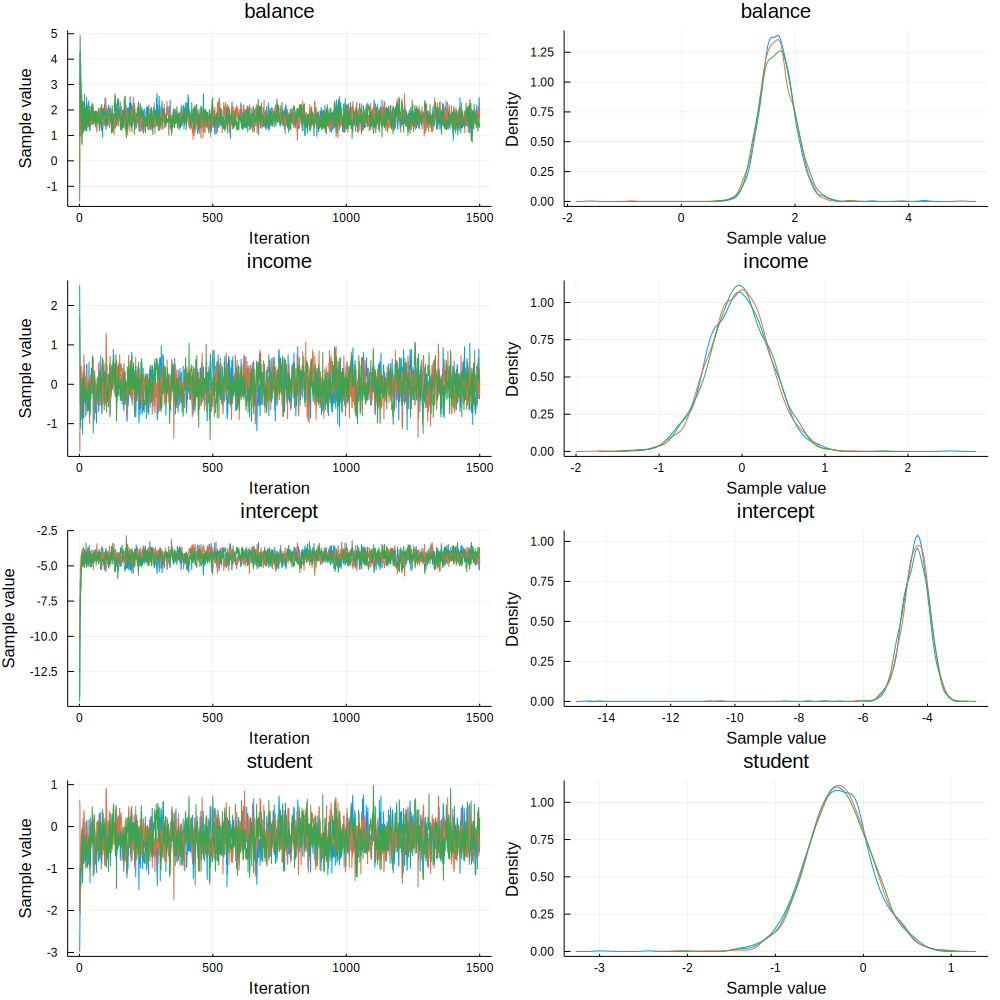

In [39]:
plot(chain)

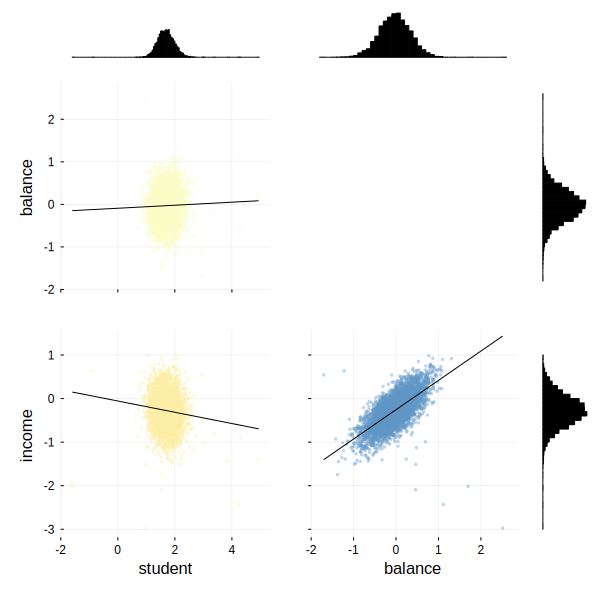

In [40]:
# The labels to use.
l = [:student, :balance, :income]
# Use the corner function. Requires StatsPlots and MCMCChain.
corner(chain, l)

In [85]:
function prediction(x::Matrix, chain, threshold)
    # Pull the means from each parameter's sampled values in the chain.
    intercept = mean(chain[:intercept].value)
    student = mean(chain[:student].value)
    balance = mean(chain[:balance].value)
    income = mean(chain[:income].value)

    # Retrieve the number of rows.
    n, _ = size(x)

    # Generate a vector to store our predictions.
    v = Vector{Float64}(undef, n)

    # Calculate the logistic function for each element in the test set.
    for i in 1:n
        num = logistic(intercept .+ student * x[i,1] + balance * x[i,2] + income * x[i,3])
        if num >= threshold
            v[i] = 1
        else
            v[i] = 0
        end
    end
    return v
end;

In [86]:
# Set the prediction threshold.
threshold = 0.10

# Make the predictions.
predictions = prediction(test, chain, threshold)

# Calculate MSE for our test set.
loss = sum((predictions - test_label).^2) / length(test_label)

0.08242105263157895

In [88]:
defaults = sum(test_label)
not_defaults = length(test_label) - defaults

predicted_defaults = sum(test_label .== predictions .== 1)
predicted_not_defaults = sum(test_label .== predictions .== 0)

# println("Defaults: defaults
#     Predictions: predicted_defaults
#     Percentage defaults correct (predicted_defaults/defaults)")

8470

In [89]:
#Import Turing, Distributions and DataFrames
using Turing, Distributions, DataFrames, Distributed

# Import MCMCChain, Plots, and StatsPlots for visualizations and diagnostics.
using MCMCChains, Plots, StatsPlots

# Set a seed for reproducibility.
using Random
Random.seed!(12);

# Turn off progress monitor.
Turing.turnprogress(false)

┌ Info: [Turing]: global PROGRESS is set as false
└ @ Turing /home/jovyan/.julia/packages/Turing/eIa7P/src/Turing.jl:24


false

In [90]:
theta_noalcohol_meds = 1    # no alcohol, took medicine
theta_alcohol_meds = 3      # alcohol, took medicine
theta_noalcohol_nomeds = 6  # no alcohol, no medicine
theta_alcohol_nomeds = 36   # alcohol, no medicine

# no of samples for each of the above cases
q = 100

#Generate data from different Poisson distributions
noalcohol_meds = Poisson(theta_noalcohol_meds)
alcohol_meds = Poisson(theta_alcohol_meds)
noalcohol_nomeds = Poisson(theta_noalcohol_nomeds)
alcohol_nomeds = Poisson(theta_alcohol_nomeds)

nsneeze_data = vcat(rand(noalcohol_meds, q), rand(alcohol_meds, q), rand(noalcohol_nomeds, q), rand(alcohol_nomeds, q) )
alcohol_data = vcat(zeros(q), ones(q), zeros(q), ones(q) )
meds_data = vcat(zeros(q), zeros(q), ones(q), ones(q) )

df = DataFrame(nsneeze = nsneeze_data, alcohol_taken = alcohol_data, nomeds_taken = meds_data, product_alcohol_meds = meds_data.*alcohol_data)
df[sample(1:nrow(df), 5, replace = false), :]

,nsneeze,alcohol_taken,nomeds_taken,product_alcohol_meds
,Int64,Float64,Float64,Float64
1,8,0.0,1.0,0.0
2,5,1.0,0.0,0.0
3,0,0.0,0.0,0.0
4,0,0.0,0.0,0.0
5,38,1.0,1.0,1.0


┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[91]:1
└ @ Core In[91]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[91]:1
└ @ Core In[91]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[91]:2
└ @ Core In[91]:2
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[91]:2
└ @ Core In[91]:2
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[91]:3
└ @ Core In[91]:3
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[91]:3
└ @ Core In[91]:3
┌ Warning: `getindex(d

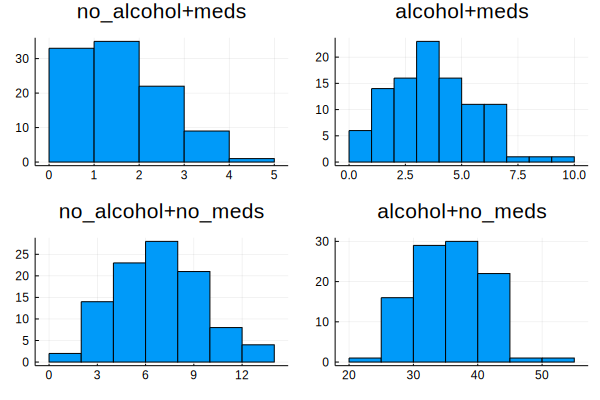

In [91]:
p1 = Plots.histogram(df[(df[:alcohol_taken] .== 0) .& (df[:nomeds_taken] .== 0), 1], title = "no_alcohol+meds")  
p2 = Plots.histogram((df[(df[:alcohol_taken] .== 1) .& (df[:nomeds_taken] .== 0), 1]), title = "alcohol+meds")  
p3 = Plots.histogram((df[(df[:alcohol_taken] .== 0) .& (df[:nomeds_taken] .== 1), 1]), title = "no_alcohol+no_meds")  
p4 = Plots.histogram((df[(df[:alcohol_taken] .== 1) .& (df[:nomeds_taken] .== 1), 1]), title = "alcohol+no_meds")  
plot(p1, p2, p3, p4, layout = (2, 2), legend = false)

In [92]:
# Convert the DataFrame object to matrices.
data = Matrix(df[[:alcohol_taken, :nomeds_taken, :product_alcohol_meds]])
data_labels = df[:nsneeze]
data


┌ Warning: `getindex(df::DataFrame, col_inds::Union{AbstractVector, Regex, Not})` is deprecated, use `df[:, col_inds]` instead.
│   caller = top-level scope at In[92]:1
└ @ Core In[92]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[92]:3
└ @ Core In[92]:3


400×3 Array{Float64,2}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 ⋮            
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  1.0

In [93]:
data = (data .- mean(data, dims=1)) ./ std(data, dims=1)

400×3 Array{Float64,2}:
 -0.998749  -0.998749  -0.576628
 -0.998749  -0.998749  -0.576628
 -0.998749  -0.998749  -0.576628
 -0.998749  -0.998749  -0.576628
 -0.998749  -0.998749  -0.576628
 -0.998749  -0.998749  -0.576628
 -0.998749  -0.998749  -0.576628
 -0.998749  -0.998749  -0.576628
 -0.998749  -0.998749  -0.576628
 -0.998749  -0.998749  -0.576628
 -0.998749  -0.998749  -0.576628
 -0.998749  -0.998749  -0.576628
 -0.998749  -0.998749  -0.576628
  ⋮                             
  0.998749   0.998749   1.72988 
  0.998749   0.998749   1.72988 
  0.998749   0.998749   1.72988 
  0.998749   0.998749   1.72988 
  0.998749   0.998749   1.72988 
  0.998749   0.998749   1.72988 
  0.998749   0.998749   1.72988 
  0.998749   0.998749   1.72988 
  0.998749   0.998749   1.72988 
  0.998749   0.998749   1.72988 
  0.998749   0.998749   1.72988 
  0.998749   0.998749   1.72988 

In [94]:
# Bayesian poisson regression (LR)
@model poisson_regression(x, y, n, σ²) = begin
    b0 ~ Normal(0, σ²)
    b1 ~ Normal(0, σ²)
    b2 ~ Normal(0, σ²)
    b3  ~ Normal(0, σ²)
    for i = 1:n
        theta = b0 + b1*x[i, 1] + b2*x[i,2] + b3*x[i,3]
        y[i] ~ Poisson(exp(theta))
    end
end;

In [96]:
# This is temporary while the reverse differentiation backend is being improved.
Turing.setadbackend(:forward_diff)
# Retrieve the number of observations.
n, _ = size(data)
# Sample using NUTS.
num_chains = 4
chains = mapreduce(c -> sample(poisson_regression(data, data_labels, n, 10), Turing.NUTS(2500, 200, 0.65) ), chainscat, 1:num_chains);

┌ Info: Found initial step size
│   init_ϵ = 0.00625
└ @ Turing.Inference /home/jovyan/.julia/packages/Turing/eIa7P/src/inference/hmc.jl:364
┌ Info: Finished 200 adapation steps
│   adaptor = StanHMCAdaptor(n_adapts=200, pc=DiagPreconditioner, ssa=NesterovDualAveraging(γ=0.05, t_0=10.0, κ=0.75, δ=0.65, state.ϵ=0.23137793672074147), init_buffer=75, term_buffer=50)
│   τ.integrator = Leapfrog(ϵ=0.231)
│   h.metric = DiagEuclideanMetric([0.000882848, 0.00192171, 0 ...])
└ @ AdvancedHMC /home/jovyan/.julia/packages/AdvancedHMC/seWi9/src/sampler.jl:129
┌ Info: Finished 2500 sampling steps in 4.2337791 (s)
│   h = Hamiltonian(metric=DiagEuclideanMetric([0.000882848, 0.00192171, 0 ...]))
│   τ = NUTS{Multinomial,Generalised}(integrator=Leapfrog(ϵ=0.231), max_depth=5), Δ_max=1000.0)
│   EBFMI_est = 1866.4005212027864
│   average_acceptance_rate = 0.853634323802048
└ @ AdvancedHMC /home/jovyan/.julia/packages/AdvancedHMC/seWi9/src/sampler.jl:138
┌ Info: Found initial step size
│   init_ϵ = 0.00

In [97]:
gelmandiag(chains)

Gelman, Rubin, and Brooks Diagnostic

│ Row │ parameters │ PSRF    │ 97.5%   │
│     │ Symbol     │ Float64 │ Float64 │
├─────┼────────────┼─────────┼─────────┤
│ 1   │ b0         │ 1.00043 │ 1.00156 │
│ 2   │ b1         │ 1.00136 │ 1.00358 │
│ 3   │ b2         │ 1.00073 │ 1.00185 │
│ 4   │ b3         │ 1.00087 │ 1.00235 │

In [98]:
chain = chains[:,:,1]
# Calculating the exponentiated means
b0_exp = exp(mean(chain[:b0]))

MethodError: MethodError: no method matching exp(::ChainDataFrame)
Closest candidates are:
  exp(!Matched::Float16) at math.jl:1018
  exp(!Matched::Complex{Float16}) at math.jl:1019
  exp(!Matched::Missing) at math.jl:1070
  ...

In [99]:
b1_exp = exp(mean(chain[:b1]))

MethodError: MethodError: no method matching exp(::ChainDataFrame)
Closest candidates are:
  exp(!Matched::Float16) at math.jl:1018
  exp(!Matched::Complex{Float16}) at math.jl:1019
  exp(!Matched::Missing) at math.jl:1070
  ...

In [100]:
b2_exp = exp(mean(chain[:b2]))

MethodError: MethodError: no method matching exp(::ChainDataFrame)
Closest candidates are:
  exp(!Matched::Float16) at math.jl:1018
  exp(!Matched::Complex{Float16}) at math.jl:1019
  exp(!Matched::Missing) at math.jl:1070
  ...

In [101]:
b3_exp = exp(mean(chain[:b3]))

MethodError: MethodError: no method matching exp(::ChainDataFrame)
Closest candidates are:
  exp(!Matched::Float16) at math.jl:1018
  exp(!Matched::Complex{Float16}) at math.jl:1019
  exp(!Matched::Missing) at math.jl:1070
  ...

In [ ]:
print("The exponent of the meaned values of the weights (or coefficients are): \n")

In [ ]:
print("b0: ", b0_exp, " \n", "b1: ", b1_exp, " \n", "b2: ", b2_exp, " \n", "b3: ", b3_exp, " \n")

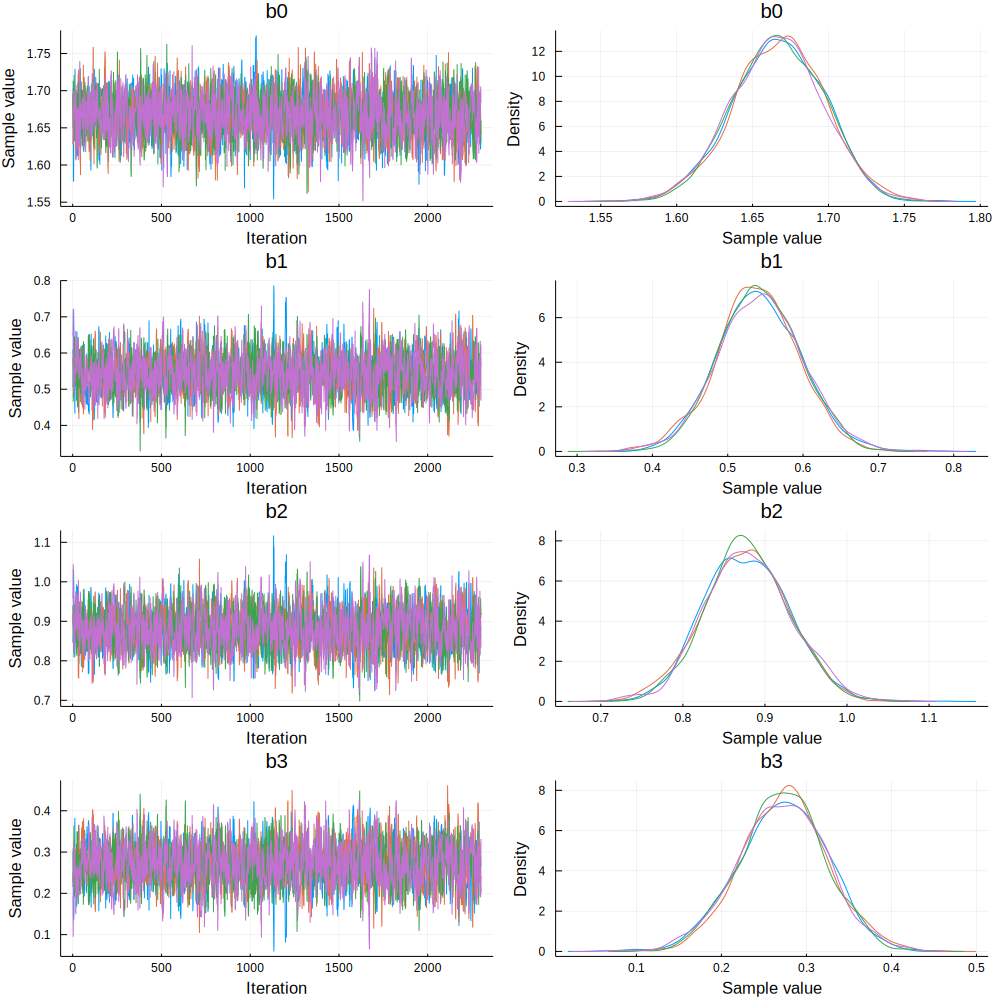

In [102]:
plot(chains)

In [103]:
describe(chains)

2-element Array{ChainDataFrame,1}

Summary Statistics
. Omitted printing of 2 columns
│ Row │ parameters │ mean     │ std       │ naive_se    │ mcse        │
│     │ Symbol     │ Float64  │ Float64   │ Float64     │ Float64     │
├─────┼────────────┼──────────┼───────────┼─────────────┼─────────────┤
│ 1   │ b0         │ 1.66699  │ 0.0297054 │ 0.0003097   │ 0.000460343 │
│ 2   │ b1         │ 0.54198  │ 0.0548864 │ 0.00057223  │ 0.00097366  │
│ 3   │ b2         │ 0.878348 │ 0.0515729 │ 0.000537684 │ 0.000891634 │
│ 4   │ b3         │ 0.272645 │ 0.0513051 │ 0.000534893 │ 0.000919393 │

Quantiles

│ Row │ parameters │ 2.5%     │ 25.0%    │ 50.0%    │ 75.0%    │ 97.5%    │
│     │ Symbol     │ Float64  │ Float64  │ Float64  │ Float64  │ Float64  │
├─────┼────────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ 1   │ b0         │ 1.6073   │ 1.64689  │ 1.66725  │ 1.68768  │ 1.72327  │
│ 2   │ b1         │ 0.435019 │ 0.505398 │ 0.541017 │ 0.578782 │ 0.649552 │
│ 3   │ b2        

In [106]:
chains_new = chains[1:200,:,:]
describe(chains_new)

2-element Array{ChainDataFrame,1}

Summary Statistics
. Omitted printing of 1 columns
│ Row │ parameters │ mean     │ std       │ naive_se   │ mcse       │ ess     │
│     │ Symbol     │ Float64  │ Float64   │ Float64    │ Float64    │ Any     │
├─────┼────────────┼──────────┼───────────┼────────────┼────────────┼─────────┤
│ 1   │ b0         │ 1.66762  │ 0.0283452 │ 0.00100215 │ 0.00116035 │ 282.986 │
│ 2   │ b1         │ 0.542486 │ 0.0522145 │ 0.00184606 │ 0.00398084 │ 162.75  │
│ 3   │ b2         │ 0.87823  │ 0.0492789 │ 0.00174227 │ 0.00370461 │ 180.689 │
│ 4   │ b3         │ 0.272472 │ 0.0487068 │ 0.00172205 │ 0.00382477 │ 127.507 │

Quantiles

│ Row │ parameters │ 2.5%     │ 25.0%    │ 50.0%    │ 75.0%    │ 97.5%    │
│     │ Symbol     │ Float64  │ Float64  │ Float64  │ Float64  │ Float64  │
├─────┼────────────┼──────────┼──────────┼──────────┼──────────┼──────────┤
│ 1   │ b0         │ 1.60937  │ 1.64839  │ 1.66738  │ 1.68647  │ 1.72122  │
│ 2   │ b1         │ 0.440518 │ 0.5088

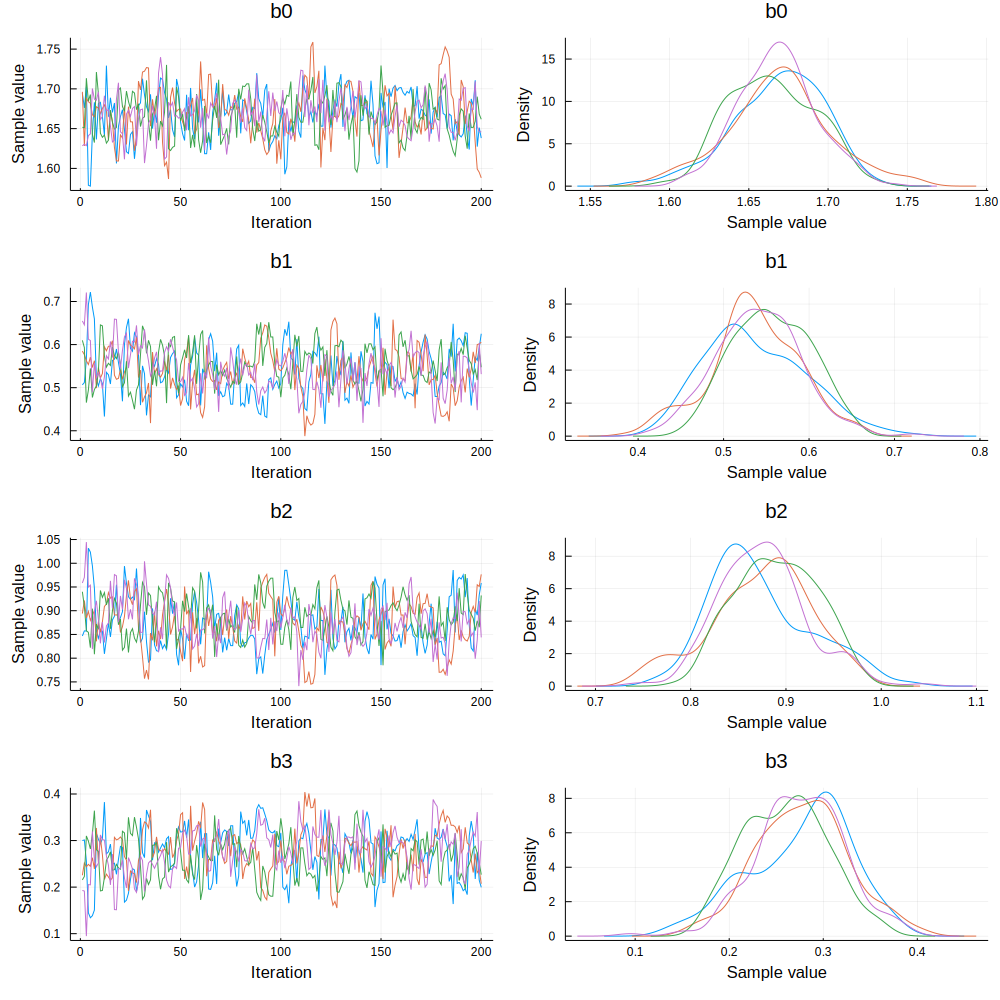

In [107]:
plot(chains_new)

### TArray
The primary array datastructure for turing is the TArray

In [37]:
using Libtask
test = Turing.TArray[[1,2,3]]

1-element Array{TArray,1}:
 [1, 2, 3]

In [28]:
 tzeros(1)

1-element TArray{Float64,1}:
 0.0

In [29]:
?TArray

search: TArray BitArray AbstractArray StridedArray PermutedDimsArray



```
TArray{T}(dims, ...)
```

Implementation of data structures that automatically perform copy-on-write after task copying.

If current*task is an existing key in `s`, then return `s[current*task]`. Otherwise, return`s[current*task] = s[last*task]`.

Usage:

```julia
TArray(dim)
```

Example:

```julia
ta = TArray(4)              # init
for i in 1:4 ta[i] = i end  # assign
Array(ta)                   # convert to 4-element Array{Int64,1}: [1, 2, 3, 4]
```


### @Model macro
Turing.Core.@model

In [ ]:
# Allows passing arguments as kwargs
model_generator(; x = nothing, y = nothing)) = model_generator(x, y)
function model_generator(x = nothing, y = nothing)
    pvars, dvars = Turing.get_vars(Tuple{:x, :y}, (x = x, y = y))
    data = Turing.get_data(dvars, (x = x, y = y))
    defaults = Turing.get_default_values(dvars, (x = default_x, y = nothing))

    inner_function(sampler::Turing.AbstractSampler, model) = inner_function(model)
    function inner_function(model)
        return inner_function(Turing.VarInfo(), Turing.SampleFromPrior(), model)
    end
    function inner_function(vi::Turing.VarInfo, model)
        return inner_function(vi, Turing.SampleFromPrior(), model)
    end
    # Define the main inner function
    function inner_function(vi::Turing.VarInfo, sampler::Turing.AbstractSampler, model)
        local x
        if isdefined(model.data, :x)
            if model.data.x isa Type && (model.data.x <: AbstractFloat || model.data.x <: AbstractArray)
                x = Turing.Core.get_matching_type(sampler, vi, model.data.x)
            else
                x = model.data.x
            end
        else
            x = model_defaults.x
        end
        local y
        if isdefined(model.data, :y)
            if model.data.y isa Type && (model.data.y <: AbstractFloat || model.data.y <: AbstractArray)
                y = Turing.Core.get_matching_type(sampler, vi, model.data.y)
            else
                y = model.data.y
            end
        else
            y = model.defaults.y
        end

        vi.logp = zero(Real)
        ...
    end
    model = Turing.Model{pvars, dvars}(inner_function, data, defaults)
    return model
end

### Priors
* Flat <: ContinuousUnivariateDistribution
* FlatPos(l::Real)
* Turing.BinomialLogit
* Turing.VecBinomialLogit
* Turing.OrderedLogistic 


### Samplers  (Turing.inference)
* all samplers need a sample method specific to them 
* <: Sampler{T}
* Gibbs(algs...) -> combine multiple samplers for different parameters eg discrete vs continuous
* HMC(ϵ::Float64, n_leapfrog::Int)
* HMCDA(n_adapts::Int, δ::Float64, λ::Float64; ϵ::Float64=0.0)
* IPMCMC(n_particles::Int, n_iters::Int, n_nodes::Int, n_csmc_nodes::Int)
* IS()
* MH(n_iters::Int)
* PG(n_particles::Int)
* PMMH(n_iters::Int, smc_alg:::SMC, parameters_algs::Tuple{MH})
* SGHMC(n_iters::Int, learning_rate::Float64, momentum_decay::Float64)
* SGLD(n_iters::Int, ϵ::Float64)
* SMC() 


In [ ]:
Turing.Inference.Gibbs

In [ ]:
@model gibbs_example(x) = begin
    v1 ~ Normal(0,1)
    v2 ~ Categorical(5)
end

In [ ]:
HMC(ϵ::Float64, n_leapfrog::Int)

In [41]:
# Load libraries.
using Turing, Plots, Random

# Turn off progress monitor.
Turing.turnprogress(false)

# Set a random seed and use the forward_diff AD mode.
Random.seed!(1234);
Turing.setadbackend(:forward_diff);

┌ Info: [Turing]: global PROGRESS is set as false
└ @ Turing /home/jovyan/.julia/packages/Turing/eIa7P/src/Turing.jl:24


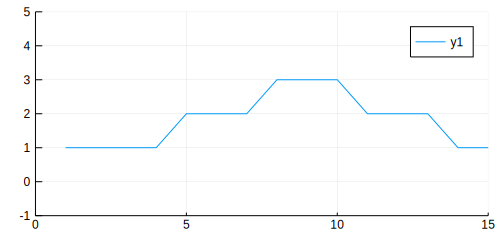

In [42]:
# Define the emission parameter.
y = [ 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 1.0, 1.0 ];
N = length(y);  K = 3;

# Plot the data we just made.
plot(y, xlim = (0,15), ylim = (-1,5), size = (500, 250))

In [43]:
# Turing model definition.
@model BayesHmm(y, K) = begin
    # Get observation length.
    N = length(y)

    # State sequence.
    s = tzeros(Int, N)

    # Emission matrix.
    m = Vector(undef, K)

    # Transition matrix.
    T = Vector{Vector}(undef, K)

    # Assign distributions to each element
    # of the transition matrix and the
    # emission matrix.
    for i = 1:K
        T[i] ~ Dirichlet(ones(K)/K)
        m[i] ~ Normal(i, 0.5)
    end

    # Observe each point of the input.
    s[1] ~ Categorical(K)
    y[1] ~ Normal(m[s[1]], 0.1)

    for i = 2:N
        s[i] ~ Categorical(vec(T[s[i-1]]))
        y[i] ~ Normal(m[s[i]], 0.1)
    end
end;

In [45]:
# g = Gibbs(1000, HMC(2, 0.001, 7, :m, :T), PG(20, 1, :s))
g = Gibbs(1000, PG(20, 1, :s, :m, :T))

c = sample(BayesHmm(y, 3), g);

┌ Info: [Gibbs] Finished with
└ @ Turing.Inference /home/jovyan/.julia/packages/Turing/eIa7P/src/inference/gibbs.jl:188
┌ Info:   Running time    = 69.14310479999999;
└ @ Turing.Inference /home/jovyan/.julia/packages/Turing/eIa7P/src/inference/gibbs.jl:189


In [47]:
# Import StatsPlots for animating purposes.
using StatsPlots

# Extract our m and s parameters from the chain.
m_set = c[:m].value.data
s_set = c[:s].value.data

# Iterate through the MCMC samples.
Ns = 1:500

# Make an animation.
animation = @animate for i in Ns
    m = m_set[i, :]; 
    s = Int.(s_set[i,:]);
    emissions = collect(skipmissing(m[s]))
    
    p = plot(y, c = :red,
        size = (500, 250),
        xlabel = "Time",
        ylabel = "State",
        legend = :topright, label = "True data",
        xlim = (0,15),
        ylim = (-1,5));
    plot!(emissions, color = :blue, label = "Sample N")
end every 10;

In [51]:
c

Object of type Chains, with data of type 1000×29×1 Array{Union{Missing, Float64},3}

Log evidence      = 0.0
Iterations        = 1:1000
Thinning interval = 1
Chains            = 1
Samples per chain = 1000
internals         = elapsed, lp
parameters        = T[1][1], T[1][2], T[1][3], T[2][1], T[2][2], T[2][3], T[3][1], T[3][2], T[3][3], m[1], m[2], m[3], s[1], s[2], s[3], s[4], s[5], s[6], s[7], s[8], s[9], s[10], s[11], s[12], s[13], s[14], s[15]

2-element Array{ChainDataFrame,1}

Summary Statistics
. Omitted printing of 1 columns
│ Row │ parameters │ mean      │ std       │ naive_se   │ mcse      │ ess     │
│     │ Symbol     │ Float64   │ Float64   │ Float64    │ Float64   │ Any     │
├─────┼────────────┼───────────┼───────────┼────────────┼───────────┼─────────┤
│ 1   │ T[1][1]    │ 0.776928  │ 0.130268  │ 0.00411942 │ 0.0387834 │ 4.12607 │
│ 2   │ T[1][2]    │ 0.113191  │ 0.112307  │ 0.00355146 │ 0.0356405 │ 4.01606 │
│ 3   │ T[1][3]    │ 0.109881  │ 0.0769355 │ 0.00243292 │ 0.02

In [54]:
subchain = c[:,["T[1][1]"],:];

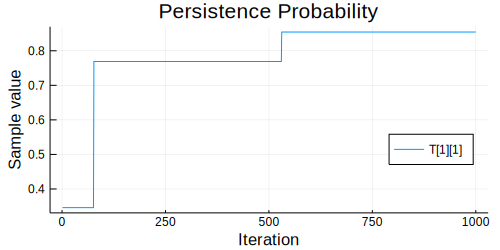

In [55]:
# Index the chain with the persistence probabilities.
# subchain = c[:,["T[i][i]" for i in 1:K],:]
# subchain = c[:,["T[1][1]" for i in 1:K],:]


# Plot the chain.
plot(subchain, 
    colordim = :parameter, 
    seriestype=:traceplot,
    title = "Persistence Probability",
    legend=:right
    )

In [56]:
heideldiag(c[:T])

1-element Array{ChainDataFrame,1}

Heidelberger and Welch Diagnostic - Chain 1
. Omitted printing of 1 columns
│ Row │ parameters │ Burn-in │ Stationarity │ p-value │ Mean    │ Halfwidth │
│     │ Symbol     │ Float64 │ Float64      │ Float64 │ Float64 │ Float64   │
├─────┼────────────┼─────────┼──────────────┼─────────┼─────────┼───────────┤
│ 1   │ T[1][1]    │ 0.0     │ 1.0          │ 0.117   │ 0.7769  │ 0.0979    │
│ 2   │ T[1][2]    │ 500.0   │ 0.0          │ 0.0     │ 0.0423  │ 0.0693    │
│ 3   │ T[1][3]    │ 500.0   │ 0.0          │ 0.0     │ 0.1219  │ 0.0382    │
│ 4   │ T[2][1]    │ 0.0     │ 1.0          │ 0.2305  │ 0.1234  │ 0.0735    │
│ 5   │ T[2][2]    │ 500.0   │ 0.0          │ 0.0     │ 0.8019  │ 0.0391    │
│ 6   │ T[2][3]    │ 500.0   │ 0.0          │ 0.0     │ 0.119   │ 0.0547    │
│ 7   │ T[3][1]    │ 500.0   │ 0.0          │ 0.0     │ 0.1578  │ 0.0151    │
│ 8   │ T[3][2]    │ 500.0   │ 0.0          │ 0.0     │ 0.1204  │ 0.049     │
│ 9   │ T[3][3]    │ 500.0   │ 

In [57]:
# Generative model.
@model BayesHmm(
    y = Vector{Real}(undef, 15),
    T = Vector{Vector{Real}}(undef, 3),
    m = Vector{Real}(undef, 3),
    K) = begin
    # Get observation length.
    N = length(y)

    # State sequence.
    s = tzeros(Int, N)

    # Observe each point of the input.
    s[1] ~ Categorical(K)
    y[1] ~ Normal(m[s[1]], 0.1)

    for i = 2:N
        s[i] ~ Categorical(vec(T[s[i-1]]))
        y[i] ~ Normal(m[s[i]], 0.1)
    end

    return y
end;

In [58]:
average_T = reshape(mean(c[200:end, :T, :].value.data, dims=1), (3,3));
learned_T = [collect(skipmissing(average_T[:, i])) for i in 1:3]
learned_m = collect(skipmissing(mean(c[200:end, :m, :].value.data, dims=1)));

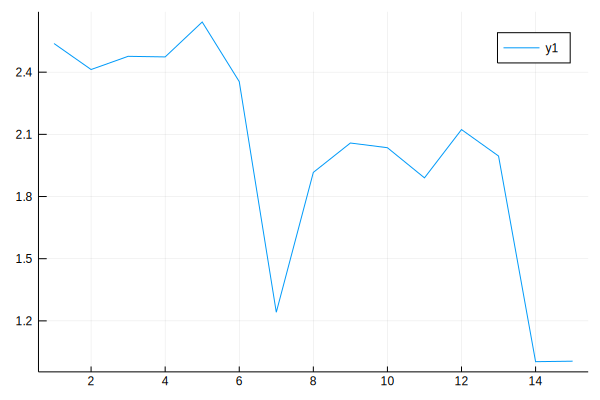

In [61]:
# Generate a single sequence.
generated_data = BayesHmm(nothing, learned_T, learned_m, 3)()
plot(generated_data)

In [71]:
# Import libraries.
using Turing, Flux, Plots, Random

# Hide sampling progress.
Turing.turnprogress(false);

# Use reverse_diff due to the number of parameters in neural networks.
Turing.setadbackend(:reverse_diff)

┌ Info: Recompiling stale cache file /home/jovyan/.julia/compiled/v1.1/Flux/QdkVy.ji for Flux [587475ba-b771-5e3f-ad9e-33799f191a9c]
└ @ Base loading.jl:1184
┌ Info: [Turing]: global PROGRESS is set as false
└ @ Turing /home/jovyan/.julia/packages/Turing/eIa7P/src/Turing.jl:24


:reverse_diff

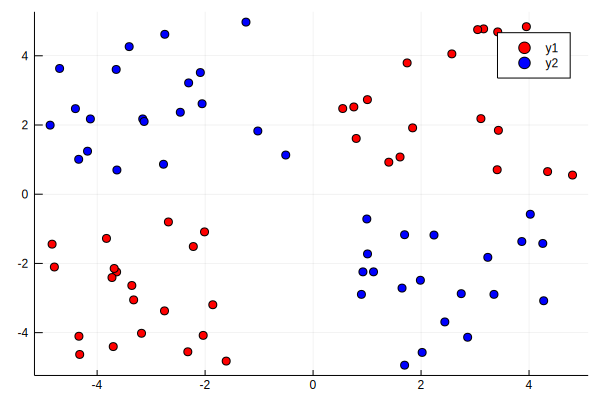

In [72]:
# Number of points to generate.
N = 80
M = round(Int, N / 4)
Random.seed!(1234)

# Generate artificial data.
x1s = rand(M) * 4.5; x2s = rand(M) * 4.5; 
xt1s = Array([[x1s[i] + 0.5; x2s[i] + 0.5] for i = 1:M])
x1s = rand(M) * 4.5; x2s = rand(M) * 4.5; 
append!(xt1s, Array([[x1s[i] - 5; x2s[i] - 5] for i = 1:M]))

x1s = rand(M) * 4.5; x2s = rand(M) * 4.5; 
xt0s = Array([[x1s[i] + 0.5; x2s[i] - 5] for i = 1:M])
x1s = rand(M) * 4.5; x2s = rand(M) * 4.5; 
append!(xt0s, Array([[x1s[i] - 5; x2s[i] + 0.5] for i = 1:M]))

# Store all the data for later.
xs = [xt1s; xt0s]
ts = [ones(2*M); zeros(2*M)]

# Plot data points.
function plot_data()
    x1 = map(e -> e[1], xt1s)
    y1 = map(e -> e[2], xt1s)
    x2 = map(e -> e[1], xt0s)
    y2 = map(e -> e[2], xt0s)

    Plots.scatter(x1,y1, color="red", clim = (0,1))
    Plots.scatter!(x2, y2, color="blue", clim = (0,1))
end

plot_data()

In [73]:
# Turn a vector into a set of weights and biases.
function unpack(nn_params::AbstractVector)
    W₁ = reshape(nn_params[1:6], 3, 2);   
    b₁ = reshape(nn_params[7:9], 3)
    
    W₂ = reshape(nn_params[10:15], 2, 3); 
    b₂ = reshape(nn_params[16:17], 2)
    
    Wₒ = reshape(nn_params[18:19], 1, 2); 
    bₒ = reshape(nn_params[20:20], 1)   
    return W₁, b₁, W₂, b₂, Wₒ, bₒ
end

# Construct a neural network using Flux and return a predicted value.
function nn_forward(xs, nn_params::AbstractVector)
    W₁, b₁, W₂, b₂, Wₒ, bₒ = unpack(nn_params)
    nn = Chain(Dense(W₁, b₁, tanh),
               Dense(W₂, b₂, tanh),
               Dense(Wₒ, bₒ, σ))
    return nn(xs)
end;

In [74]:
# Create a regularization term and a Gaussain prior variance term.
alpha = 0.09
sig = sqrt(1.0 / alpha)

# Specify the probabalistic model.
@model bayes_nn(xs, ts) = begin
    # Create the weight and bias vector.
    nn_params ~ MvNormal(zeros(20), sig .* ones(20))
    
    # Calculate predictions for the inputs given the weights
    # and biases in theta.
    preds = nn_forward(xs, nn_params)
    
    # Observe each prediction.
    for i = 1:length(ts)
        ts[i] ~ Bernoulli(preds[i])
    end
end;

In [75]:
# Perform inference.
N = 5000
ch = sample(bayes_nn(hcat(xs...), ts), HMC(N, 0.05, 4));

┌ Info: Finished 5000 sampling steps in 23.5865722 (s)
│   h = Hamiltonian(metric=UnitEuclideanMetric([1.0, 1.0, 1.0, 1.0, 1.0, 1 ...]))
│   τ = StaticTrajectory(integrator=Leapfrog(ϵ=0.05), λ=4))
│   EBFMI_est = 1181.850158741871
│   average_acceptance_rate = 0.9388290523684962
└ @ AdvancedHMC /home/jovyan/.julia/packages/AdvancedHMC/seWi9/src/sampler.jl:138


In [76]:
# Extract all weight and bias parameters.
theta = ch[:nn_params].value.data;

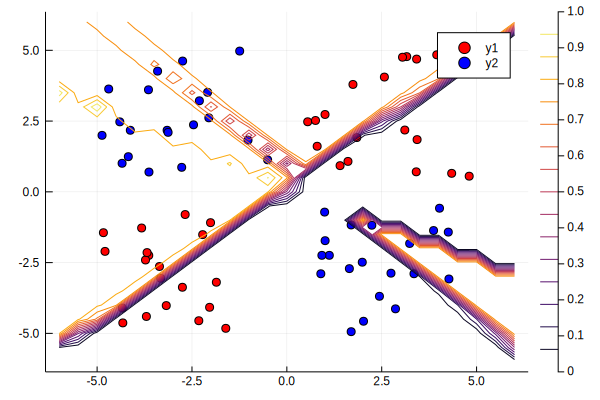

In [77]:
# Plot the data we have.
plot_data()

# Find the index that provided the highest log posterior in the chain.
_, i = findmax(ch[:lp].value.data)

# Extract the max row value from i.
i = i.I[1]

# Plot the posterior distribution with a contour plot.
x_range = collect(range(-6,stop=6,length=25))
y_range = collect(range(-6,stop=6,length=25))
Z = [nn_forward([x, y], theta[i, :])[1] for x=x_range, y=y_range]
contour!(x_range, y_range, Z)

In [78]:
# Return the average predicted value across
# multiple weights.
function nn_predict(x, theta, num)
    mean([nn_forward(x, theta[i,:])[1] for i in 1:10:num])
end;

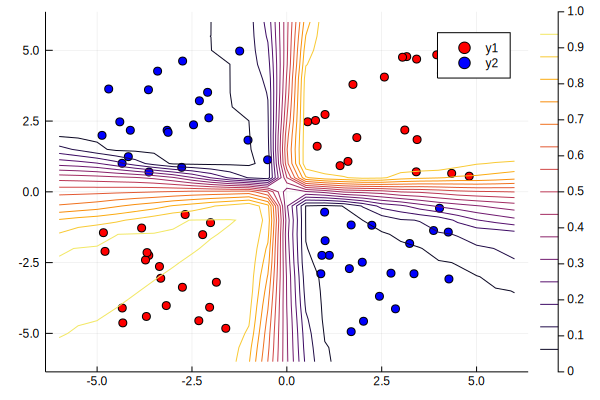

In [79]:
# Plot the average prediction.
plot_data()

n_end = 1500
x_range = collect(range(-6,stop=6,length=25))
y_range = collect(range(-6,stop=6,length=25))
Z = [nn_predict([x, y], theta, n_end)[1] for x=x_range, y=y_range]
contour!(x_range, y_range, Z)

In [ ]:
# Number of iterations to plot.
n_end = 500

anim = @animate for i=1:n_end
    plot_data()
    Z = [nn_forward([x, y], theta[i,:])[1] for x=x_range, y=y_range]
    contour!(x_range, y_range, Z, title="Iteration", clim = (0,1))
end every 5;

In [ ]:
# Specify the network architecture.
network_shape = [
    (3,2, :tanh),
    (2,3, :tanh), 
    (1,2, :σ)]

# Regularization, parameter variance, and total number of
# parameters.
alpha = 0.09
sig = sqrt(1.0 / alpha)
num_params = sum([i * o + i for (i, o, _) in network_shape])

# This modification of the unpack function generates a series of vectors
# given a network shape.
function unpack(θ::AbstractVector, network_shape::AbstractVector)
    index = 1
    weights = []
    biases = []
    for layer in network_shape
        rows, cols, _ = layer
        size = rows * cols
        last_index_w = size + index - 1
        last_index_b = last_index_w + rows
        push!(weights, reshape(θ[index:last_index_w], rows, cols))
        push!(biases, reshape(θ[last_index_w+1:last_index_b], rows))
        index = last_index_b + 1
    end
    return weights, biases
end

# Generate an abstract neural network given a shape, 
# and return a prediction.
function nn_forward(x, θ::AbstractVector, network_shape::AbstractVector)
    weights, biases = unpack(θ, network_shape)
    layers = []
    for i in eachindex(network_shape)
        push!(layers, Dense(weights[i],
            biases[i],
            eval(network_shape[i][3])))
    end
    nn = Chain(layers...)
    return nn(x)
end

# General Turing specification for a BNN model.
@model bayes_nn(xs, ts, network_shape, num_params) = begin
    θ ~ MvNormal(zeros(num_params), sig .* ones(num_params))
    preds = nn_forward(xs, θ, network_shape)
    for i = 1:length(ts)
        ts[i] ~ Bernoulli(preds[i])
    end
end

# Set the backend.
Turing.setadbackend(:reverse_diff)

# Perform inference.
num_samples = 500
ch2 = sample(bayes_nn(hcat(xs...), ts, network_shape, num_params), Turing.NUTS(num_samples, 0.65));
# ch2 = sample(bayes_nn(hcat(xs...), ts, network_shape, num_params), SMC());

┌ Info: Found initial step size
│   init_ϵ = 0.05
└ @ Turing.Inference /home/jovyan/.julia/packages/Turing/eIa7P/src/inference/hmc.jl:364
┌ Info: Finished 250 adapation steps
│   adaptor = StanHMCAdaptor(n_adapts=250, pc=DiagPreconditioner, ssa=NesterovDualAveraging(γ=0.05, t_0=10.0, κ=0.75, δ=0.65, state.ϵ=0.039613286196141795), init_buffer=75, term_buffer=50)
│   τ.integrator = Leapfrog(ϵ=0.0396)
│   h.metric = DiagEuclideanMetric([0.449622, 4.41293, 0.58987 ...])
└ @ AdvancedHMC /home/jovyan/.julia/packages/AdvancedHMC/seWi9/src/sampler.jl:129


In [89]:
# This function makes predictions based on network shape.
function nn_predict(x, theta, num, network_shape)
    mean([nn_forward(x, theta[i,:], network_shape)[1] for i in 1:10:num])
end;

# Extract the θ parameters from the sampled chain.
params2 = ch2[:θ].value.data

plot_data()

x_range = collect(range(-6,stop=6,length=25))
y_range = collect(range(-6,stop=6,length=25))
Z = [nn_predict([x, y], params2, num_samples, network_shape)[1] for x=x_range, y=y_range]
contour!(x_range, y_range, Z)

BoundsError: BoundsError: attempt to access 250×20×1 Array{Union{Missing, Float64},3} at index [251, Base.Slice(Base.OneTo(20))]